## Problem 1: Set up Github and clone assignment repo. 

- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- Click on this link: https://classroom.github.com/a/Xk990Gdv
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/apmae4990-hw-project-{your-git-username}```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!). This is where you will store all of your homework and your final project. 


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ cd apmae4990-hw-project-{your-git-username} ```

``` $ git add myhomeworksolutions.ipynb ```

``` $ git commit -m "added my homework 1 solutions" ```

``` $ git push origin master $ ```

**Writing to the notebook:** To write code in this notebook, you can create a new cell directly below the problem. Either click `Insert -> Insert Cell Below` or type `CTRL-M` **then** `B`.


### Very important!!

Do not expect to understand every single import statement or piece of code when you first start. You should always think about what your goal is, and try to figure out how to do it yourself. However in many cases it is much easier to simply search stack overflow for the *right* way to do something. You are free to do this and do not need to include any references. This is largely how engineers and data scientists discover things in practice when they are unfamiliar with a topic. 


## Problem 1: Gradients and Hessians

Recall the definition of the gradient $\nabla f(x)$  of a function $f: \mathbb{R}^n \to \mathbb{R}$ which is the n-vector of partial derivatives 
$$\nabla f = \begin{pmatrix}\frac{\partial f}{\partial x_1}\\ \vdots \\ \frac{\partial f}{\partial x_n}\end{pmatrix}  \; \textrm{ where } x=\begin{pmatrix}x_1 \\ \vdots \\ x_n\end{pmatrix}$$






$$D^2f = \begin{pmatrix}\frac{\partial^2f}{\partial x_1 \partial x_1} & \cdots & \frac{\partial^2f}{\partial x_1 \partial x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial^2f}{\partial x_n \partial x_1} & \cdots & \frac{\partial^2f}{\partial x_n \partial x_n}\end{pmatrix} $$

When proving rules for derivatives below, you can *either work with indices and use results from single variable
calculus, or you can use the multivariable definition of the derivative if you wish (https://en.wikipedia.org/wiki/Total_derivative)*.

**[5 points]** a) Let $f(x) = \frac{1}{2} x^TAx + b^Tx$ where $A \in \mathbb{R}^{n \times n}$ is a symmetric matrix and $b \in \mathbb{R}^n$ is a vector.  What is $\nabla f(x)$?

**[Solution]** $\nabla f(x) = Ax + b^T$, which is a $\mathbb{R}^n$ vector

**[5 points]** b) Let f(x) = g(h(x)), where $g: \mathbb{R} \to \mathbb{R}$ is differentiable and $h:\mathbb{R}^n \to \mathbb{R}$ is differentiable. What is $\nabla f(x)$?

**[Solution]** $\nabla f(x) = g'(h(x)) \cdot h'(x)$

**[5 points]** c) Let $f(x) = \frac{1}{2}x^T Ax + b^Tx$ where $A$ and $b$ are as above. What is $D^2f(x)$?

**[Solution]** $D^2f(x) = A$

**[10 points]** d) Show that the product rule holds for the dot product in $\mathbb{R}^n$. More precisely, let $f:\mathbb{R}^k \to \mathbb{R}^n$ and $g:\mathbb{R}^k \to \mathbb{R}^n$. Show that

$$\nabla ( F(\beta)^T \cdot G(\beta)) =  G(\beta)^T \cdot \nabla F(\beta) \cdot  + F(\beta)^T \cdot \nabla G(\beta). $$

**Hint:** Recall that $F(\beta)$ and $G(\beta)$ are row vectors, so that $F(\beta)^T \cdot G(\beta)$ is a scalar. This implies that $\nabla ( F(\beta)^T \cdot G(\beta))$ is a vector. Check the right hand side to confirm this in your head. We can write 

$$F(\beta)^T \cdot G(\beta) = \sum_{i=1}^n F_i(\beta) G_i(\beta),$$

where $F(\beta) = (F_1(\beta),F_2(\beta),\cdots,F_n(\beta))$ and $G(\beta) = (G_1(\beta),G_2(\beta),\cdots,G_n(\beta))$ are $n$ dimensional vectors and $\beta$ is a $k$ dimensional vector. Thus you will be computing expressions such as $\partial_{\beta_j} F_i(\beta)$ and showing the left side is equal to the right side above. 



**[Solution]**

$$\nabla [F(\beta)^T⋅G(\beta)] = \nabla [\sum_i^n F_i(\beta)⋅G_i(\beta)]$$

$$=\sum_i^n \nabla F_i(\beta) \cdot G_i(\beta) + F_i(\beta) \cdot \nabla G_i(\beta)$$

$$=\sum_i^n \nabla F_i(\beta) \cdot G_i(\beta) + \sum_i^n F_i(\beta) \cdot \nabla G_i(\beta)$$

$$=G(\beta)^T \cdot \nabla F(\beta) + F(\beta)^T \cdot \nabla G(\beta)$$

## Problem 2: Vector calculus for linear regression

Let $\mathbf{Y} \in \mathbb{R}^n$, $\mathbf{X} \in \mathbb{R}^{n \times k}$ and $\beta \in \mathbb{R}^k$. Specifically, 

$$ \mathbf{X} = \begin{pmatrix}x_{11} & \cdots & x_{1k} \\ \vdots & \ddots & \vdots \\ x_{n1} & \cdots & x_{nk}\end{pmatrix} \textrm{ and }  \mathbf{Y}=\begin{pmatrix}y_1 \\ \vdots \\ y_n\end{pmatrix} $$



Here we imagine that $\mathbf{Y}$ is a vector of observations of a quantity we wish to model, and $\mathbf{X}$ is a matrix with $k$ features. For instance $\mathbf{Y}$ is the vector of the number of units sold of an item, and $\mathbf{X}$ is a matrix with each row corresponding to a sale, and the amount of advertising revue from different channels being represented by the columns. We seek to model $\mathbf{Y}$ as a linear function of $\mathbf{X}$. In other words, we wish to find $\beta$ which solves:

$$ \min_{\beta} \|\mathbf{Y} - \mathbf{X} \beta\|^2$$

**[10 points]** a) Assume that $\mathbf{X}$ is orthogonal. That is, we denote 

$$\mathbf{X} = [ \mathbf{x}_1 \cdots \mathbf{x}_k],$$
then $$\mathbf{x_i} \cdot \mathbf{x_j} = \delta_{ij}.$$

where $\delta_{ij} = 1$ if and only if $i=j$ and is $0$ otherwise. This is known as the **Kronecker delta** function.

Initially you have $k < n$, but you decide that more information should be better. As a result, you add in an additional $n-k$ orthnormal features, so that $k=n$. Under these assumptions, what is the solution to the above minimization problem in terms of $\mathbf X$? Did it depend on which orthnormal features you added? Why would this make you suspicious?

**Note:** *Do not take any derivatives for this problem. Solve the problem directly by observation and state what the value of the minimum value of the loss is for this beta. *

**Hint:** What do you know about the invertibility of orthonormal matricies? Also, this is not a trick question. The following may be helpful: https://en.wikipedia.org/wiki/Orthogonal_matrix


**[Solution]**

$\mathbf{X}$ is ${n \times n}$ orthogonal matrix, so $\mathbf{X^TX}$ is vertible. Therefore, $\hat{\beta}_{n \times 1} = (\mathbf{X^TX})^{-1}\mathbf{XY}$

However, although we can get a unique solution for $\hat{\beta}$, it must cause overfitting issue because the model is learning too much noise from all features. But the noise is randomly, so it will give a very bad prediction in the test.

**[10 points]** b) Let's keep the orthnormal assumption but assume now that $k$ can take on any value $k > 1$. By writing 

$$F(\beta) := \|\mathbf{Y} - \mathbf{X} \beta\|^2 = \langle \mathbf{Y} - \mathbf{X} \beta, \mathbf{Y} - \mathbf{X} \beta \rangle,$$

where $\langle, \rangle$ denotes the vector dot product, compute $\nabla F(\beta)$ and set it zero. Use this to find the optimal $\beta$. What property of $\mathbf X^T\mathbf X$ did you need to use here? Is this consistent with your answer to a) when $k=n$?

**Hint:** The product rule holds for inner products that you proved in Problem 1d), ie.

**[Solution]**

$\langle \mathbf{Y} - \mathbf{X} \beta, \mathbf{Y} - \mathbf{X} \beta \rangle = (\mathbf{Y} - \mathbf{X}\beta )^T(\mathbf{Y} - \mathbf{X}\beta)$

$\nabla F(\beta) = \nabla (\mathbf{Y} - \mathbf{X}\beta)^T(\mathbf{Y} - \mathbf{X}\beta)$
$= \nabla(\mathbf{Y^TY} - 2\beta^T\mathbf{X^TY} + \beta^T\mathbf{X^TX}\beta) = -\mathbf{X^TY} + \mathbf{X^TX}\beta = 0$

when $\mathbf{X^TX}$ is full rank matrix, it exists inverse matrix, $\mathbf{X^TX}\beta = \mathbf{X^TY} \rightarrow \hat{\beta} = (\mathbf{X^TX})^{-1}\mathbf{X^TY}$


**[10 points]** c) You decide to penalize the coefficients as a result of your answer to a). As such, you define 

$$ F_{\lambda}(\beta) := \|\mathbf{Y} - \mathbf{X} \beta\|^2 + \lambda \|\beta\|^2. $$

Show that the solution to $\min_{\beta} F_{\lambda}(\beta)$ is 

$$\beta = (\mathbf X^T\mathbf X +\lambda I)^{-1} \mathbf X^Ty.$$

What happens as $\lambda \to +\infty$? (You can make a heuristic argument. Rigorous proofs aren't required but a convincing answer is). This new constrained minimization problem is well known and called **Ridge Regression**. Given your answer to part a), can you suggest a reason why we may want to consider this problem instead?

**[Solution]**
$$Min_{\beta} F_{\lambda}(\beta) := \|\mathbf{Y} - \mathbf{X} \beta\|^2 + \lambda \|\beta\|^2$$

$$\nabla (\mathbf{Y} - \mathbf{X}\beta)^T(\mathbf{Y} - \mathbf{X}\beta + \lambda\beta^T\beta)$$

$$\mathbf{X^TY} = (\mathbf{X^TX} + \lambda I)\beta$$

$$\hat{\beta} = (\mathbf{X^TX} + \lambda I)^{-1}\mathbf{X^TY}$$

The main reason to perform **Ridge Regression** is that analyzing multiple regression data that suffer from multicollinearity and overfitting. When overfitting occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value. Therefore, minimize our loss function and also constrain on the number of features in the model.
 
This approach makes the estimated coefficients are shrunken towards zero relative to the least squares estimates, so that has also the effect of reducing variance.
* $\lambda \rightarrow +\infty $: penalty effect grows, ridge regression coefficient will approaches zero, leading to decreased variance but increased bias
* $\lambda \rightarrow 0$: no effect, equivalent to regular linear regression

Back to part a), fit **Ridge Regression** to penalize on the number of features, so it will force less importance features toward zero in order to handling overfitting.

## Problem 3: Frequentist Inference

The problem of machine learning can be expressed as trying to infer a reproducible rule from data. Let's take the classic example of flipping a coin. In this problem, you friend claims that a coin is not fair and you want to prove them wrong. You're a *frequentist* though, so you draw your conclusions from sample data by emphasizing the frequency or proportion of the data.


Let $\{X_i\}$ be a sequence of *independent* Bernoulli random variables with probability $p$, ie. 
$$
\begin{gather*}
f(X_i) =
\begin{cases}
  p & \text{for } X_i=1\\    
  1-p & \text{for } X_i=0 
\end{cases}
\end{gather*}
$$


In this case, we assume here that we actually know $p$, but will attempt to derive $p$ from raw data *assuming we didn't know p*. The purpose of this is to establish consistency of our methods and to know that our estimate will be accurate in a problem where we don't have access to any knowledge of $p$. 

**References:** The following references may be useful for this exercise, but not are not required reading: 

https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval

https://en.wikipedia.org/wiki/Binomial_distribution

**[5 points]** a) You flip the coin $N$ times and observe $N$ heads. What would be your intuition about the value of $p$? Does it depend on $N$? What about $N/2$ heads?

**[Solution]**: My intuition $p$ is 1. If observe $N/2$ heads, $p$ is 1/2

**[5 points]** b) What is the probability of obtaining exactly $k$ heads out of $N$ flips? This is a well known distribution. Which one?

**[Solution]**: $P(exactly\  k\  heads\ out\ of\  N\ flips) = \binom{N}{k}p^kp^{N-k}$, which follow binomial distribution.

**[10 points]** c) We can see that the number of heads out of $N$ flips can be written as

$$Z_N := \sum_{i=1}^N X_i.$$
    
Compute the expectation of $Z_N$. 

**Hint:** Recalling linearity of expectation will be helpful here:

$$\mathbb{E}\left ( \sum_{i=1}^N X_i \right) = \sum_{i=1}^N \mathbb{E}(X_i). $$ Then compute the expectation of $\mathbb{E}(X_i)$ in terms of $p$. 

**[Solution]:**
$$E(Z_N) := E(\sum_{i=1}^N X_i) = \sum_{i=1}^N E(X_i) = Np$$

**[5 points]** d) Compute the variance of $\tilde Z_N := \frac{1}{N} Z_N$:
    $$ \textrm{Var}(\tilde Z_N) := \mathbb{E}(\tilde Z_n - \mathbb{E}(\tilde Z_N))^2$$
  
  Show that it can be written as
  
  $$ \textrm{Var}(\tilde Z_N) = \frac{p(1-p)}{N}.$$
  
  **Hint:** Your computation should use statistical **independence** of $\{X_i\}_{i=1}^N$ at some point in the calculation after expanding $\tilde Z_N^2$. This tells us that $\mathbb{E}(X_i X_j) = \mathbb{E}(X_i) \mathbb{E}(X_j)$ for $i \neq j$. In other words, since the coin flips are independent, we can find the expected value of the product of the outcome in terms of the product of the expected value of each coin flip independently. 

**[Solution]:**
$$ \textrm{Var}(X) := \mathbb{E}(X^2) - \mathbb{E}(X)^2 = p - p^2 = p(1-p)$$

Since the coin flips are independent
$$ \textrm{Var}(Z_N) := \textrm{Var}(\sum_i^N{X_i}) = N \textrm{Var}(X_i) = Np(1-p)$$

$$ \textrm{Var}(\tilde Z_N) = \textrm{Var}(\frac{Z_N}{N}) = \frac{1}{N^2} \textrm{Var}(Z_N) = \frac{p(1-p)}{N}$$

**[5 points]** e) Under the assumption $p=\frac{1}{2}$, plot the probability of obtaining $k$ heads after $N$ trials for multiple values of $N$ and compare to the corresponding normal distribution with the same mean and variance you derived above. In other words, $\mathcal{N}\left(\mathbb{E}( Z_N), p(1-p)N\right)$. What do you notice about the two?

**Note: You just need to runt his code. It is done for you already**

E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
E:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


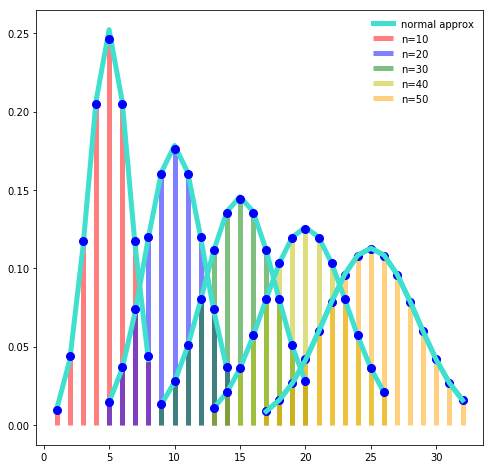

In [3]:
%matplotlib inline

from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

n, p = 10, 0.5
fig, ax = plt.subplots(1, 1, figsize=(8,8))

colors=['r','b','g','y','orange']
i = 0

for n in [10,20,30,40,50]:

    rv = binom(n, p)
    x = np.arange(binom.ppf(0.01, n, p),
                  binom.ppf(0.99, n, p))
    mu = n*p
    variance = p*(1-p)*n
    sigma = math.sqrt(variance)

    plt.plot(x,mlab.normpdf(x, mu, sigma),color='turquoise',linewidth=5)


    ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8)
    ax.vlines(x, 0, binom.pmf(x, n, p), colors=colors[i], lw=5, alpha=0.5,label="n={0}".format(n))
    i = i + 1
    
plt.plot(x,mlab.normpdf(x, mu, sigma),color='turquoise',linewidth=5, label='normal approx')
ax.legend(loc='best', frameon=False)

**[Solution]:** when $N$ trials get larger, the more likely close to normal distribution.

The reason this is true is actually the **Central Limit Theorem**! This says that

$$ Z_n := \frac{ \sum_{i=1}^N X_i - np}{\sqrt{n p(1-p)}} \to \mathcal{N}(0,1).$$

More precisely 

$$ \lim_{n \to +\infty} P(a \leq Z_n \leq b) = \frac{1}{\sqrt{2\pi }} \int_a^b e^{-z^2/2} dz$$

**[10 points]** f) Now let's imagine that we don't know the true $p$, but we want to estimate it from the data. Let's define the **estimator**

$$ \hat p = \frac{1}{N}\sum_{i=1}^N X_i. $$


Using the result of part e), conclude that we can write (you can assume here that $N$ is sufficiently large and $p$ is not near $0$ or $1$)

$$ \hat p = p + \epsilon_N,$$

where $\epsilon_N$ is a normally distributed error term. *Note that $\epsilon_N$ will also depend on $p$ here, and that you are just being asked to rewrite the expression for $Z_n$ above*. Your answer should be of the form $\epsilon_N \sim \mathcal{N}(\mu(N,p), \sigma(N,p))$ where $\mu(N,p)$ and $\sigma(N,p)$ denote the mean and variance as functions of $N$ and $p$.

What happens to the variance as $N \to +\infty$? 

**Note:** An estimator is any estimate of a statistical quantity from data. It is usually denoted with a hat on top of the variable to denote this.  

**[Solution]:**

$$\tilde Z_n := \frac{\sum_{i=1}^N X_i/n - p}{\sqrt{p(1-p)/n}} \to \hat{p} \sim \mathcal{N}(p, \frac{p(1-p)}{n})$$

$$\epsilon_N \sim \mathcal{N}(0, \frac{p(1-p)}{n})$$

 When $N \to +\infty$, the variance of $\epsilon_N$ will approach to 0, so $\hat{p} \to p$

**[10 points]** g) Assume again that the real $p=1/2$ (but again we don't know this yet). For a normal random variable, we know that 95% of the data lies between roughly two standard deviations from the mean. In other words, if $Z \sim \mathcal{N}(\mu,\sigma)$ then 

$$ P(-1.96\sigma \leq Z - \mu \leq 1.96\sigma) \sim 0.95.$$


 Use the above equation, combined with the result of part f) to find the number of flips $N$ so that our estimate $\hat p$ is within $0.1$ of the actual value of $p=1/2$ with 95% confidence. You should start with an estimate of the form $-1.96\sigma(p,N) \leq \hat p - p \leq 1.96\sigma(p,N)$.

In reality, this doesn't help us, because $\sigma(p,N)$ depends on $p$ itself! Let's now say that we perform $N$ flips and observe that $\hat p = 4/9$. Repeat the last estimate but by replacing $p$ with $\hat p$, so that you start with an inequality such as

$$ -1.96\sigma(\hat p,N) \leq \hat p - p \leq 1.96\sigma(\hat p,N).$$
 
** Replacing $p$ with $\hat p$ thing that needs to be done when obtaining confidence intervals.**

**[Solution]:**

Calculating flips N from confident interval, and $\hat{p} = 4/9$

$$1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} = 0.1 \rightarrow n = 95$$

## Problem 4: Bayesian Inference

Your friend has a coin which they claim is *unbiased*, ie. the probability of getting a heads or tails is 0.5. You've now decided to become a *Bayesian*, and believe probability expresses a degree of belief in an event, which can change as new information is gathered, rather than a fixed value based upon frequency or propensity



 You therefore define your initial *prior* on the bias of the coin which is a distribution, ie. 

$$ f_0(p) = 1 \textrm{ for } p \in [0,1],$$

where $p$ is the probability of the coin being heads (called the *bias*), $f_0(p)$ is the pdf of the distribution of possible biases of the coin. For example, if you knew that the coin was exactly fair, then that would mean that $f_0(p) = \delta_{p=1/2}$ where $\delta_{x}$ is the Dirac delta function centered at x (https://en.wikipedia.org/wiki/Dirac_delta_function). 

a) **[10 points]** What is the probability of observing exactly  k  heads out of  N  flips if the coin bias is  p ? Let  $D_{k,N}$  represent the data you observe, which is k heads out of N flips (this is a well known distribution)

**[Solution]:** $p(exactly\ k\ heads\ out\ of\ N\ flips | p_0 = 1) = 1$, $f(D_{k,N}|p)= \binom{N}{k}p^k(1-p)^{N-k}$


b) **[5 points]** You flip the coin $N$ times and observe $k=N$ heads. If $N$ was large, what is your intuition about what the bias of the coin is?

**[Solution]:** The bias of the coin is 1

c) **[10 points]** Let's quantify this now. What is your updated *posterior distribution* on the bias of the coin p? Use **Bayes theorem** here:

$$f(p \lvert D_{N,N}) = \frac{f(D_{N,N} \lvert p) f_0(p)}{\int f(D_{N,N} |s) f_0(s)ds}, $$

where $D$ is your observed data. In this case $N$ heads out of $N$ flips. Recall that the posterior (here denoted $f(p \lvert D_{N,N})$), is the distribution which has been updated with the additional observations you've made).

**Hint:** You will end up with a simple integral in the denominator

**[Solution]:**

$$f(D_{N,N} \lvert p = \binom{N}{N}p^N(1-p)^{N-N} = p^N$$

$$f_0(p) = 1$$

$$\int_0^1 f(D_{N,N} |s) \cdot f_0(s)ds = \int_0^1 p^N d(p) = \frac{1}{N+1}$$

$$f(p \lvert D_{N,N}) = (N+1)p^N$$

d) **[5 points]** What is $\mathbb{E}(p \lvert D)$? The expected bias conditioned on the observed data:

$$ \mathbb{E}(p \lvert D_{N,N}) := \int_0^1 p f(p \lvert D_{N,N})dp?$$

What happens as $$\lim_{N \to +\infty} \mathbb{E}(p \lvert D_{N,N})?$$

**[Solution]:** 

$$\mathbb{E}(p \lvert D_{N,N}) := \int_0^1 p \cdot f(p \lvert D_{N,N})dp = \int_0^1 p \cdot (N+1)p^N d(p) = 1-\frac{1}{N+2}$$

$$\lim_{N \to +\infty} \mathbb{E}(p \lvert D_{N,N}) = 1$$

e) **[15 points]** What happens to $f(p \lvert D_{N,N})$ as $N \to +\infty$? Characterize the limiting distribution. What is your interpretation of this result? A rigorous argument isn't required. 

**Hint 1:** We already discussed what "perfect certainty" would mean in terms of the distribution. 

**Hint 2:** Consider carefully the seperate cases $0 \leq p < 1$ and $p=1$ and recall that $\int_p f(p \lvert D_{N,N})dp = 1$ for all $N$. Also consider what 100% confidence would mean in terms of the distribution. 


**[Solution]:**

$$f(p \lvert D_{N,N}) = (N+1)p^N = \frac{(N+1)}{(\frac{1}{p})^N}$$

* When $0 \leq p < 1, N \to +\infty$, then $f(p \lvert D_{N,N}) = 0$ because if observe N flips getting N heads (N is large), there is no chance we can get parameter $p \in [0,1)$

* When $p = 1, N \to +\infty$, then $f(p \lvert D_{N,N}) \to 1$. Although integrating with a single value is meaningless which is 0, but intuitively, observing N heads after N flips (N is large), we can conclude that 100% confident parameter $p$ is equal to 1.

f) **[10 points]** Repeat c) but in the case that you observe $k=N/2$ heads out of $N$ trials. Do not try to compute the integral, but hypothesisze what happens as $N \to +\infty$.

**[Solution]:**

*posterior distribution*

$$f(p \lvert D_{N,N/2}) \propto (p(1-p))^{N/2}$$

When $N \to +\infty$, I can conclude that the expectation of *posterior distribution* is 1/2.
$$\lim_{N \to +\infty} \mathbb{E}(p \lvert D_{N,N}) = \frac{1}{2}$$